In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("preprocessed_data.csv")
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
dataset.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
dataset.cov()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,3.472173,-0.100514,0.118393,-0.106052,0.160844
PaymentTier,-0.100514,0.315210,0.020676,0.016022,-0.052712
Age,0.118393,0.020676,23.291116,-1.012542,-0.117212
ExperienceInCurrentDomain,-0.106052,0.016022,-1.012542,2.428113,-0.022580
LeaveOrNot,0.160844,-0.052712,-0.117212,-0.022580,0.225670


In [5]:
dataset.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


In [6]:
import seaborn as sns

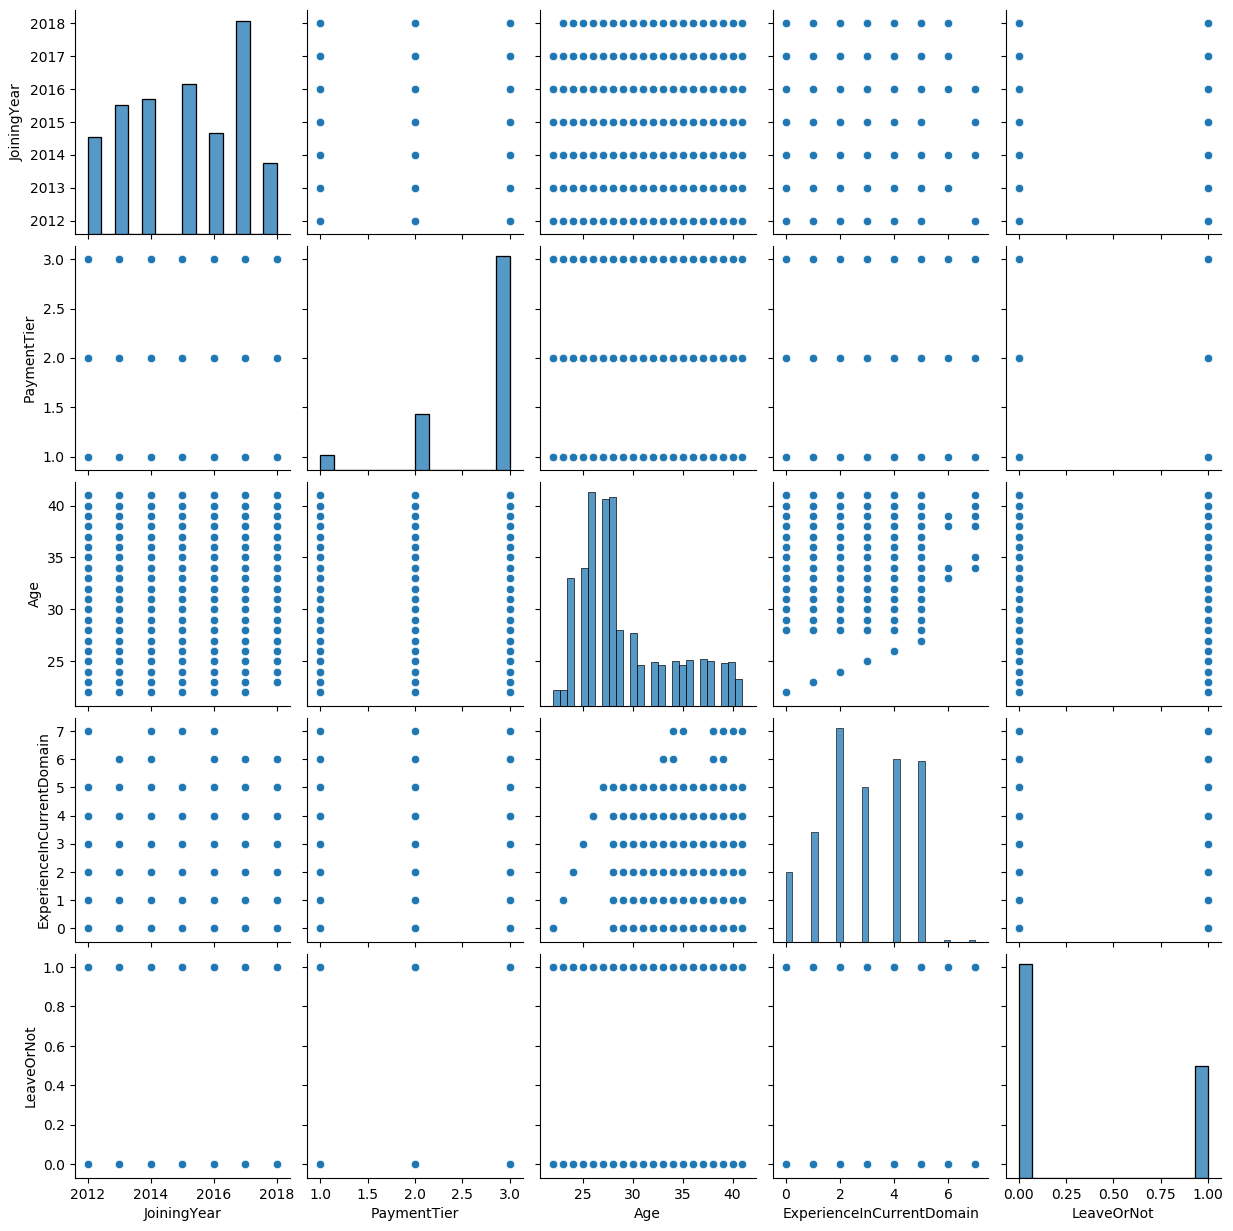

In [7]:
sns.pairplot(dataset)

In [9]:
#!pip install statsmodels

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [16]:
calc_vif(dataset[["Age","LeaveOrNot"]])

,variables,VIF
0,Age,1.486149
1,LeaveOrNot,1.486149


In [18]:
dataset[dataset["Gender"]=="Male"]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
...,...,...,...,...,...,...,...,...,...
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# Independant Sample- Unpaired T Test¶
Diferrent Group but same contion

In [19]:
from scipy.stats import ttest_ind
#drop null values
dataset=dataset.dropna()
male=dataset[dataset["Gender"]=="Male"]["LeaveOrNot"]
female=dataset[dataset["Gender"]=="Female"]["LeaveOrNot"]
#print(male)
ttest_ind(male,female)

Ttest_indResult(statistic=-15.431912224382536, pvalue=1.9526435271724477e-52)

In [21]:
from scipy.stats import ttest_ind
#drop null values
dataset=dataset.dropna()
male=dataset[dataset["Gender"]=="Male"]["PaymentTier"]
female=dataset[dataset["Gender"]=="Female"]["PaymentTier"]
#print(male)
ttest_ind(male,female)

Ttest_indResult(statistic=16.49714141458203, pvalue=1.8275499180273742e-59)

In [23]:
from scipy.stats import ttest_ind
#drop null values
dataset=dataset.dropna()
male=dataset[dataset["Gender"]=="Male"]["ExperienceInCurrentDomain"]
male1=dataset[dataset["Gender"]=="Female"]["ExperienceInCurrentDomain"]
#print(male)
ttest_ind(male,male1)

Ttest_indResult(statistic=0.5964413316029384, pvalue=0.5509094638243549)

# Dependant Sample-Paired T_Test
Same Group but Different Condition

In [27]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['Gender']=='Male']['PaymentTier']
male1 = dataset[dataset['Gender']=='Male']['ExperienceInCurrentDomain']
ttest_rel(male, male1)

Ttest_relResult(statistic=-3.553107536240426, pvalue=0.00038704987545848645)

In [28]:
import scipy.stats as stats
stats.f_oneway(dataset["JoiningYear"],dataset["PaymentTier"],dataset["Age"])

F_onewayResult(statistic=686751489.1077017, pvalue=0.0)

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Two-way ANOVA
ano=ols("JoiningYear~LeaveOrNot+PaymentTier",data=dataset).fit()
two=sm.stats.anova_lm(ano,type=2)

In [30]:
two

,df,sum_sq,mean_sq,F,PR(>F)
LeaveOrNot,1.0,533.306847,533.306847,159.391569,5.941085e-36
PaymentTier,1.0,60.848857,60.848857,18.186143,2.043065e-05
Residual,4650.0,15558.394049,3.345891,NaN,NaN
